### Материалы:

[Ссылка на дашборд](https://public.tableau.com/profile/vladimir7867#!/vizhome/13657/sheet2)

[Ссылка на презентацию](https://docs.google.com/presentation/d/1ueMregREa2Kjq8J4y1TuUZ6_9dXV6SL8gLzuDp2ADJ4/edit?usp=sharing)





## Анализ оттока клиентов

#### Задача:

Для менеджера по продукту необходимо проанализировать клиентов регионального банка и выделить портрет клиентов, которые склонны уходить из банка.

- Провести исследовательский анализ данных,
- Выделите портреты клиентов, которые склонны уходить из банка,
- Проверить статистические гипотезы.

### Оглавление
1. #### <a href='#ch1'>Загрузка, первичный осмотр и предобработка данных</a>
 - <a href='#ch1_2'>изучение пропусков</a>
 - <a href='#ch1_3'>приведение типов данных</a>
 - <a href='#ch1_4'>поиск дубликатов</a>
 - <a href='#ch1_1'>вывод</a>
2. #### <a href='#ch2'>Исследовательский анализ данных</a>
 - <a href='#ch2_1'>меры центральной тенденции</a>
 - <a href='#ch2_2'>распределения признаков</a>
 - <a href='#ch2_3'>корреляционный анализ</a>
 - <a href='#ch2_4'>вывод</a>
3. #### <a href='#ch3'>Описание портрета клиента склонного уходить</a>
 - <a href='#ch3_1'>портрет клиента склонного к оттоку</a>
4. #### <a href='#ch4'>Проверка статистических гипотез</a>
 - <a href='#ch4_1'>гипотеза о различиях дохода между теми клиентами, которые ушли (отток) и теми, которые остались</a>
 - <a href='#ch4_2'>гипотеза о различиях количества используемых продуктов между теми клиентами, которые ушли (отток) и теми, которые остались</a>
5. #### <a href='#ch5'>Вывод по проекту</a>

#### Описание данных
- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

______

#### <a id='ch1'>Загрузка, первичный осмотр и предобработка данных</a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats as st

____

In [3]:
bank = pd.read_csv('/datasets/bank_dataset.csv')

In [4]:
bank.head()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#Для удобства приведу заголоки колонок к нижнему регистру
bank.columns = bank.columns.str.lower()

##### <a id='ch1_2'>Изучение пропусков</a>

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
userid              10000 non-null int64
score               10000 non-null int64
city                10000 non-null object
gender              10000 non-null object
age                 10000 non-null int64
objects             10000 non-null int64
balance             6383 non-null float64
products            10000 non-null int64
creditcard          10000 non-null int64
loyalty             10000 non-null int64
estimated_salary    10000 non-null float64
churn               10000 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Таблица bank состоит из 12 колонок и 10000 записей. Колонки имеют разные типы данных, так же колонка balance имеет пропуски, возможно, это связано с отсутствующими открытыми счетами у этих клиентов.

In [7]:
bank[(bank['products'] == 1 ) & (bank['balance'].isnull()) ]

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
18,15704243,587,Рыбинск,М,45,6,NaN,1,0,0,158684.81,0
22,15742045,510,Рыбинск,Ж,38,4,NaN,1,1,0,118913.53,1
24,15667783,846,Ярославль,Ж,38,5,NaN,1,1,1,187616.16,0
38,15760162,850,Ярославль,М,36,7,NaN,1,1,1,40812.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9962,15637348,702,Рыбинск,М,44,9,NaN,1,0,0,59207.41,1
9969,15849096,609,Ярославль,М,41,6,NaN,1,0,1,112585.19,0
9983,15699446,613,Ярославль,М,40,4,NaN,1,0,0,151325.24,0
9992,15699841,726,Рыбинск,М,36,2,NaN,1,1,0,195192.40,0


In [8]:
bank['products'].max()

4

In [9]:
bank['products'].min()

1

Сложно определить, является ли счет продуктом, так как мы не знаем сколько всего продуктов, а знаем лишь то, что некоторые максимально пользовались 4.  

In [10]:
bank['balance'].min()

3768.69

Минимальная сумма на счете 3768,69, нулевых значений нет, как и близких к ним. Скорее всего пропуски в счете означают 0 баланс.

In [11]:
#Доля пропусков в группе оттока
round(bank[(bank['churn'] == 1)& (bank['balance'].isnull())]['userid'].count() / bank[bank['churn'] == 1]['userid'].count(),2)

0.25

In [12]:
#Доля пропусков в группе клиентов, которые остались с банком
round(bank[(bank['churn'] == 0)& (bank['balance'].isnull())]['userid'].count() / bank[bank['churn'] == 0]['userid'].count(),2)

0.39

В группе оттока 25% клиентов имеют пропуски в счете, а в группе, тех кто остались, таких прпусков 39%. 

Принято решение не заполнять пропуски нулем, даже если счет 0. Заполнение нулем повлияет на средние значения в группах, игнорируя их мы посчитаем только существующие суммы на счете клиентов.

##### <a id='ch1_3'>Приведение типов данных</a>

In [13]:
#Преобразуем категориальные переменные в таблице гендер, где 0 - Ж , а 1 - М
encoder =  LabelEncoder()
bank['gender'] =  encoder.fit_transform(bank['gender'])

Преобразовал категориальные переменные для удобства определения по половому признаку.

##### <a id='ch1_4'>Поиск дубликатов</a>

In [14]:
#Проверим на наличие дубликатов
bank.duplicated().sum()

0

Наши данные не имеют полных дубликатов

##### <a id='ch1_1'>Вывод:</a>
Данные загружены в переменную bank, таблица имеет размеры 10000 на 12, существующие пропуски принято оставить без изменения, не было обнаружено дубликатов, а так же, для удобства определения по половому признаку, были преобразованы категориальные данные в столбце gender

_____

#### <a id='ch2'>Исследовательский анализ данных</a>

##### <a id='ch2_1'>Изучение мер центральной тенденции</a>

In [15]:
bank.drop('userid', axis=1).describe()

,score,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.497932,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Таблица со средними значениями дает нам понять, что в представленных данных клиентов мужчин больше, примерно 70% клиентов имеют кредитные карты, чуть больше половины клиентов считаются активными, а в группе отток около 20% клиентов. Можем заметить, что в количественных данных средние значения и медиальные не сильно различаются, это может говорить о том, что у нас нет сильных выбросов.


В общем, наш самый средний клиент имеет 652 балла скоринга, это мужчина в возрасте 37 лет, имеет 5 объектов в собственности, на счете у него около 120 тысяч, пользуется 1 продуктом банка, имеет кредитную карту, это активный пользователь и его заработная плата около 100 тысяч.

##### <a id='ch2_2'>Распределения признаков</a>

In [16]:
# Разделим наши характеристики на два списка, в первом будут количественные данные, а во втором категориальные
list_cat = ['age','score', 'objects', 'balance', 'products', 'estimated_salary']
list_cat_2 = ['city','gender', 'creditcard', 'loyalty']

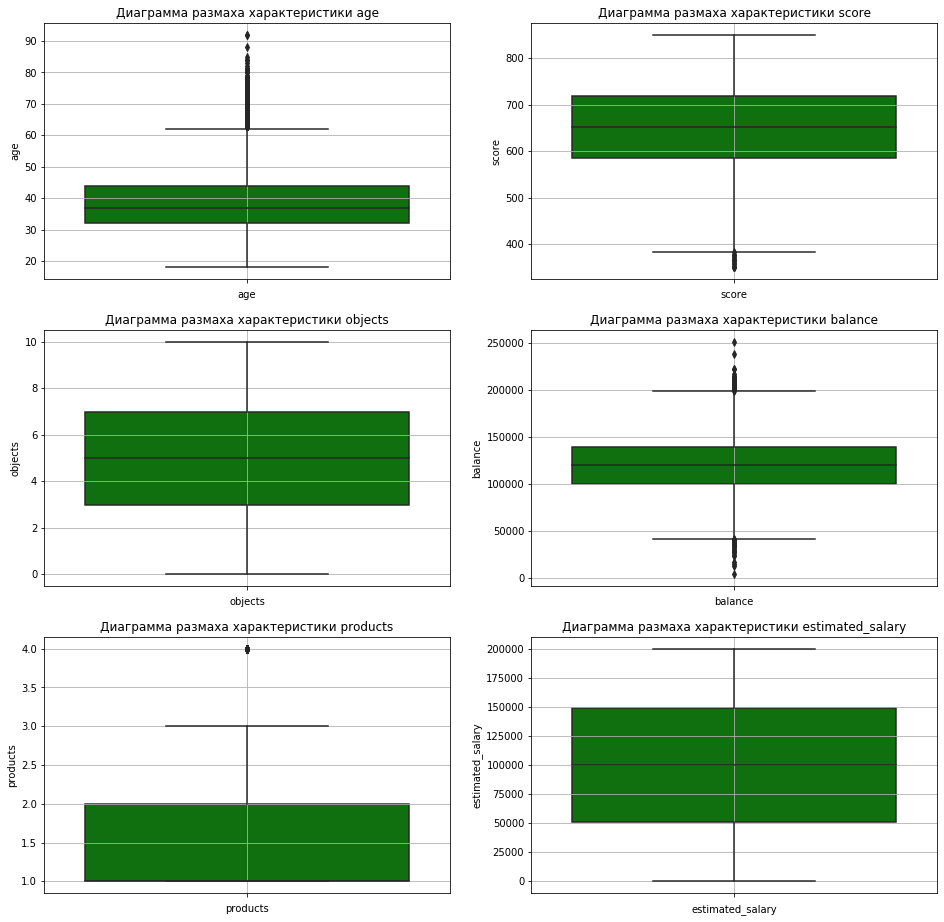

In [17]:
a=1
plt.figure(figsize=(16,16))
for i in list_cat:
    
    plt.subplot(3,2,a)
    plt.title('Диаграмма размаха характеристики' +' '+ i )
    sns.boxplot(data=bank, y=i, color='g')
    plt.xlabel(i)
    plt.grid(True)
   
    a += 1

На графиках выше мы можем увидеть, как распределены наши данные. Некоторые характеристики имеют выбросы, а именно в возрасте, баллах кредитного скоринга, балансе на счете и в количестве используемых продуктов. 

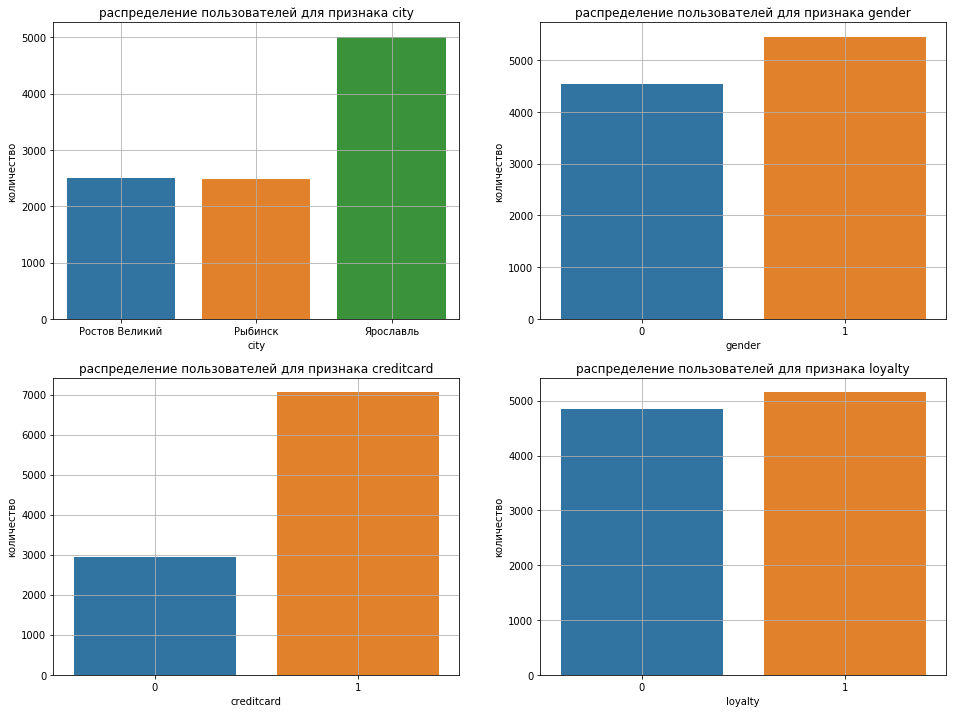

In [18]:
a=1
plt.figure(figsize=(16,12))
for i in list_cat_2:
    tabl = bank.groupby(i)['userid'].count().reset_index()

    plt.subplot(2,2,a)
    plt.title('распределение пользователей для признака' +' '+ i )
    sns.barplot(data=tabl, x=i, y='userid')
    plt.ylabel('количество')
    plt.grid(True)
    a += 1

Большинство наших клиентов проживает в Ярославле, в Ростове Великом и Рыбинске живет примерно поровну, преобладающее количество клиентов — мужчины, а кредитную карту имеют 70% наших клиентов, активных клиентов немногим больше, чем неактивных. 

##### <a id='ch2_3'>Корреляционный анализ</a>

Проверим, как взаимосвязаны наши характеристики, есть ли корреляция между ними. Проверим это используя коэффициент Пирсона.

In [19]:
bank.drop('churn', axis=1).corr()

,userid,score,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary
userid,1.000000,0.005308,-0.002641,0.009497,-0.014883,-0.008690,0.016972,-0.014025,0.001665,0.015271
score,0.005308,1.000000,-0.002857,-0.003965,0.000842,-0.004744,0.012238,-0.005458,0.025651,-0.001384
gender,-0.002641,-0.002857,1.000000,-0.027544,0.014733,0.025742,-0.021859,0.005766,0.022544,-0.008112
age,0.009497,-0.003965,-0.027544,1.000000,-0.009997,-0.012822,-0.030680,-0.011721,0.085472,-0.007201
objects,-0.014883,0.000842,0.014733,-0.009997,1.000000,0.005827,0.013444,0.022583,-0.028362,0.007784
balance,-0.008690,-0.004744,0.025742,-0.012822,0.005827,1.000000,-0.001027,0.006721,-0.020418,-0.001856
products,0.016972,0.012238,-0.021859,-0.030680,0.013444,-0.001027,1.000000,0.003183,0.009612,0.014204
creditcard,-0.014025,-0.005458,0.005766,-0.011721,0.022583,0.006721,0.003183,1.000000,-0.011866,-0.009933
loyalty,0.001665,0.025651,0.022544,0.085472,-0.028362,-0.020418,0.009612,-0.011866,1.000000,-0.011421
estimated_salary,0.015271,-0.001384,-0.008112,-0.007201,0.007784,-0.001856,0.014204,-0.009933,-0.011421,1.000000


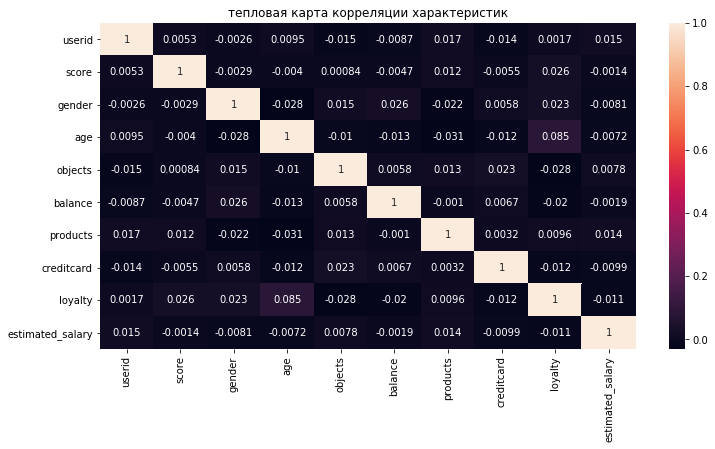

In [20]:
plt.figure(figsize=(12,6))
plt.title('тепловая карта корреляции характеристик')
sns.heatmap(bank.drop('churn', axis=1).corr(), annot=True)

Характеристики наших клиентов практически не коррелируют между собой, что исключает влияние одной характеристики на другую. 

##### <a id='ch2_4'>Вывод:</a>
Был проведен исследовательский анализ данных по итогам анализа нами был описан среднестатистический клиент банка:
Наш средний клиент имеет 652 балла скоринга, это мужчина в возрасте 37 лет, имеет 5 объектов в собственности, на счете у него около 120 тысяч, пользуется 1 продуктом банка, имеет кредитную карту, это активный пользователь, его заработная плата около 100 тысяч и ,скорее всего, проживает в городе Ярославле.
Так же наши характеристики не влияют друг на друга их корреляция близка к нулю. 

#### <a id='ch3'>Портрет клиента склонного к оттоку</a>

Далее мы рассмотрим клиента склонного уходить и сравним его с лояльным клиентом, клиент который остается в банке.

Средние характеристики клиента, который склонен оставаться с банком

In [21]:
bank[bank['churn'] == 0].drop(['userid','churn'], axis=1).describe()

,score,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary
count,7963.000000,7963.000000,7963.000000,7963.000000,4846.000000,7963.000000,7963.000000,7963.000000,7963.000000
mean,651.853196,0.572523,37.408389,5.033279,119535.864270,1.544267,0.707146,0.554565,99738.391772
std,95.653837,0.494744,10.125363,2.880658,29944.927372,0.509536,0.455101,0.497045,57405.586966
min,405.000000,0.000000,18.000000,0.000000,14262.800000,1.000000,0.000000,0.000000,90.070000
25%,585.000000,0.000000,31.000000,3.000000,99118.230000,1.000000,0.000000,0.000000,50783.490000
50%,653.000000,1.000000,36.000000,5.000000,119791.215000,2.000000,1.000000,1.000000,99645.040000
75%,718.000000,1.000000,41.000000,7.000000,139747.397500,2.000000,1.000000,1.000000,148609.955000
max,850.000000,1.000000,92.000000,10.000000,221532.800000,3.000000,1.000000,1.000000,199992.480000


In [22]:
#Доля клиентов, которые открыли счет в банке
4846 / 7963

0.6085646113273891

Средний клиент, который склонен оставаться с банком, имеет средний возраст в 37,5 лет, среднюю зарплату окола 100 тысяч,  имеет 5 объектов в собственности, чаще всего использует  1 или 2 продукта банка, у 61% клиентов открыт счет, у 71% есть кредитные карты, а на счету хранится около 120 тысяч. Большинство клиентов, которые остаются с банком, активные.

Средние характеристики клиента, который покинул банк

In [23]:
bank[bank['churn'] == 1].drop(['userid','churn'], axis=1).describe()

,score,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary
count,2037.000000,2037.000000,2037.000000,2037.000000,1537.000000,2037.000000,2037.000000,2037.000000,2037.000000
mean,645.351497,0.440844,44.837997,4.932744,120746.971132,1.475209,0.699067,0.360825,101465.677531
std,100.321503,0.496610,9.761562,2.936106,30555.192802,0.801521,0.458776,0.480358,57912.418071
min,350.000000,0.000000,18.000000,0.000000,3768.690000,1.000000,0.000000,0.000000,11.580000
25%,578.000000,0.000000,38.000000,2.000000,103700.690000,1.000000,0.000000,0.000000,51907.720000
50%,646.000000,0.000000,45.000000,5.000000,119948.090000,1.000000,1.000000,0.000000,102460.840000
75%,716.000000,1.000000,51.000000,8.000000,137986.580000,2.000000,1.000000,1.000000,152422.910000
max,850.000000,1.000000,84.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199808.100000


In [24]:
#Доля клиентов, которые открыли счет в банке
1537/2037

0.7545409916543937

Средний клиент, который покинул банк. Его средний возраст 45 лет, имеет среднюю зарплату чуть выше 100 тысяч, в среднем 5 объектов недвижимости, на балансе было около 120 тысяч, так же пользовался 1 или 2 продуктами, у 70% были кредитные карты. Кардинальные различия с клиентами, которые остаются с банком, в возрасте, активности (покинувшие клиенты были в среднем менее активны и лояльны банку), но интересно, что покинувшие клиенты имели большую долю открытых счетов (75% против 61%).

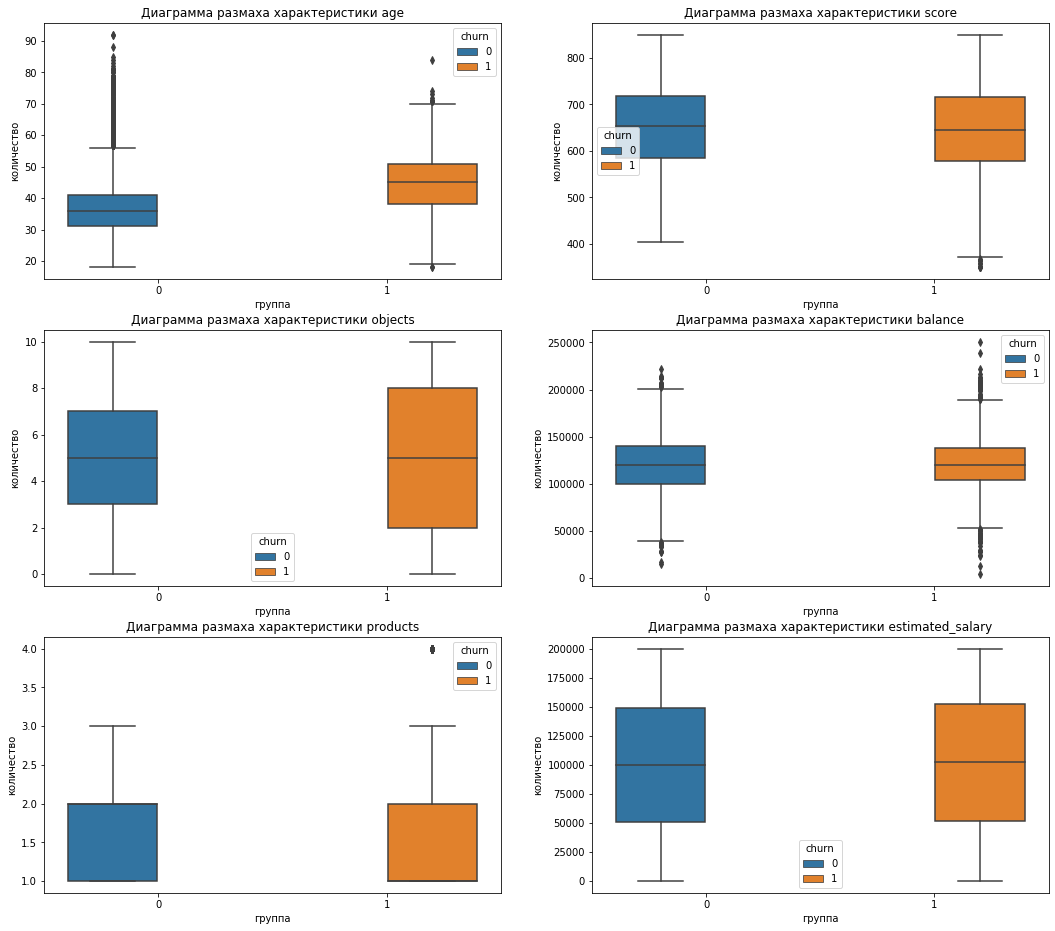

In [25]:

a=1
plt.figure(figsize=(18,16))
for i in list_cat:
    
    plt.subplot(3,2,a)
    plt.title('Диаграмма размаха характеристики' +' '+ i )
    sns.boxplot(data=bank, y=i, x='churn', hue='churn')
    plt.xlabel('группа')
    plt.ylabel('количество')

   
    a += 1

На диаграмме распределения видно, что средние значения сильнее всего разнится в возрасте, так же заметно, что в группе оттока разброс по объектам больше, чем у тех, кто остается с банком.

Построим столбчатые диаграммы для категориальных признаков

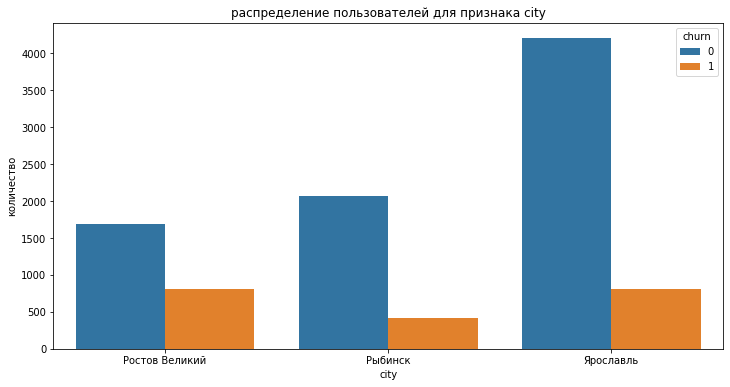

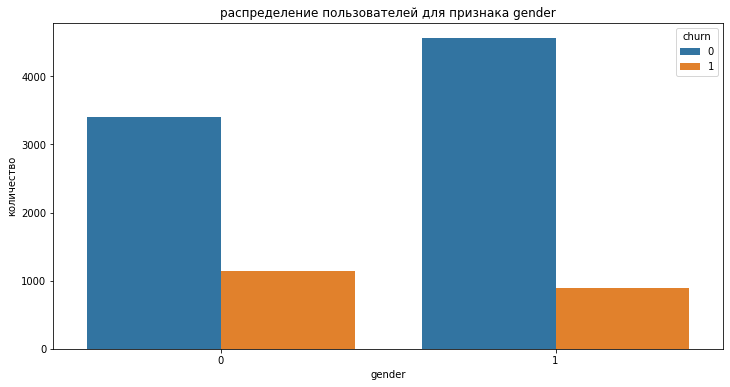

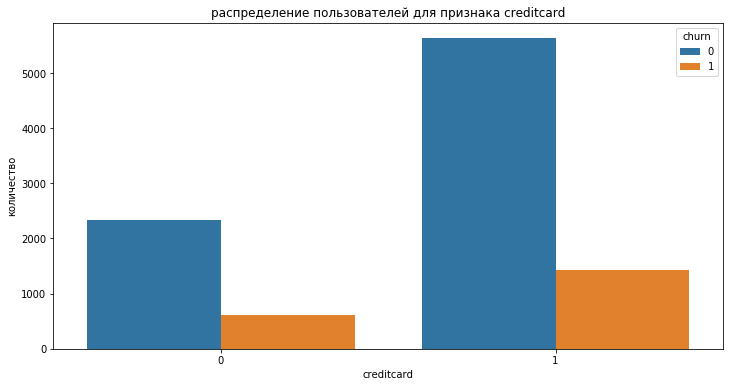

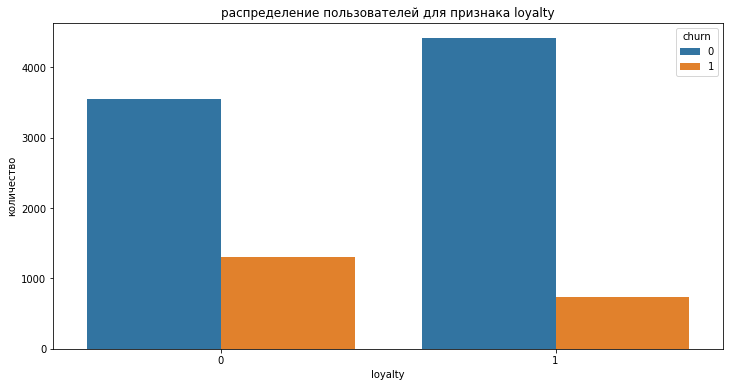

In [26]:
for i in list_cat_2:
    tabl = bank.groupby([i,'churn'])['userid'].count().reset_index()

    plt.figure(figsize=(12,6))
    plt.title('распределение пользователей для признака' +' '+ i )
    sns.barplot(data=tabl, x=i, y='userid', hue='churn')
    plt.ylabel('количество')


In [27]:
print('Доля оттока в Ростов Великий:',round(810/4204,2))
print('Доля оттока в Рыбинске:',round(413/2064,2))
print('Доля оттока в Ярославле:',round(814/1695),2)

Доля оттока в Ростов Великий: 0.19
Доля оттока в Рыбинске: 0.2
Доля оттока в Ярославле: 0 2


Сложно выделить самый "дружелюбный" город, доля оттока у всех примерно одинакова, только в Ростове Великом она на 1 % ниже, чем в других городах, но точно можно сказать, что в Ярославле самый большой охват. Ушедших женщин больше, чем мужчин, но в целом мужчин больше. Большинство клиентов пользуются кредитной картой, а активность клиентов распределена примерно по ровну, но неактивные клиенты уходят чаще.

##### <a id='ch3_1'>Портрет клиента склонного к оттоку</a>

Средний клиент, который склонен к оттоку, в преобладающих случаях это женщина, в возрасте около 45 лет, это неактивный клиент, он так же, как и лояльный клиент банка, имеет 5 объектов собственности, пользуется чаще 1 или 2 продуктами банка, и имеет кредитную карту. На счету у него, в среднем, 120 тысяч, а средняя зарплата около 100 тысяч, но его  баллы кредитного скоринга чуть меньше, чем у лояльного клиента, а проживать такой клиент может в любом из 3-х городов.  

#### <a id='ch4'>Проверка статистических гипотез</a>

##### <a id='ch4_1'>Гипотеза о различиях дохода между теми клиентами, которые ушли и теми, которые остались</a>

Значима ли разница в доходе между клиентами, которые ушли и теми, которые остались, быть может средняя зарплата клиентов из группы оттока больше и им необходимы какие-то другие условия. 

Посчитаем средние значения, дисперсию и стандартное отклонение для каждой группы

In [28]:
charact = round(bank\
.groupby('churn')['estimated_salary']\
.agg([np.mean, lambda var: np.var(var, ddof=1), lambda std: np.std(std, ddof=1)])).reset_index()

In [29]:
charact.columns = ['group', 'mean', 'variance', 'std']
charact

,group,mean,variance,std
0,0,99738.0,3.295401e+09,57406.0
1,1,101466.0,3.353848e+09,57912.0


Дисперсия и стандартное отклонение получаются большими, но между группами различаются не сильно, как и в среднем доходе.

In [30]:
#Доход клиентов, которые ушли
salary_churn_1 = bank[bank['churn'] == 1]['estimated_salary']
#Доход клиентов, которые остались
salary_churn_0 = bank[bank['churn'] == 0]['estimated_salary']

Text(0.5, 1.0, 'доход группы, оставшихся с банком клиентов')

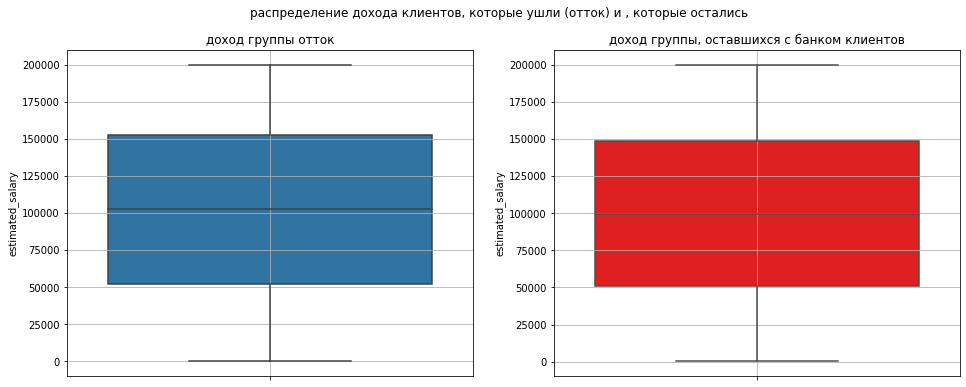

In [31]:
fig=plt.figure(figsize=(16,6))
plt.suptitle('распределение дохода клиентов, которые ушли (отток) и , которые остались')
fig = plt.subplot(121)
sns.boxplot(y=salary_churn_1)
plt.title('доход группы отток')
plt.grid(True)
plt.subplot(122)
sns.boxplot(y= salary_churn_0, color='red')
plt.grid(True)
plt.title('доход группы, оставшихся с банком клиентов')

Доход в группах распределены равномерно и не имеют выбросов, можем заметить, как квартили клиентов группы оттока чуть выше, чем у клиентов, которые остались с банком. 

In [32]:
#Разница среднего дохода
salary_churn_1.mean()/salary_churn_0.mean()

1.017318163327584

Клиенты группы оттока получают на 1,73% больше, чем клиенты в группе оставшихся с банком. 

##### Проверим нашу гипотезу о том, что доход различен между теми клиентами, которые ушли и теми, которые остались.
Чтобы понять, различаются ли средний доход клиентов, из разных групп, будем использовать критерий о равенстве средних двух совокупностей. 

Сформулируем гипотезы
###### H0
Средний доход между теми клиентами, которые ушли и теми, которые остались одинаков.
###### H1
Средний доход между теми клиентами, которые ушли и теми, которые остались различается.

In [33]:
alpha = 0.05
result = st.ttest_ind(salary_churn_1, salary_churn_0)
print('p-значение',result.pvalue)
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение 0.22644042802223346
Не получилось отвергнуть нулевую гипотезу


##### Вывод
Полученное p-значение говорит нам о том, что мы можем подтвердить нашу нулевую гипотезу, и говорить о том, что средний доход из группы оттока в целом не отличается от среднего дохода группы клиентов, которые остаются в банке. 

#### <a id='ch4_2'>Гипотеза о различиях количества используемых продуктов между теми клиентами, которые ушли (отток) и теми, которые остались</a>

Если клиент пользуется большим числом продуктов, то он более лоялен? Есть ли разница в числе используемых продуктов между клиентами, которые ушли (отток) и теми, которые остались?

In [34]:
charact_2 = bank\
.groupby('churn')['products']\
.agg([np.mean, lambda var: np.var(var, ddof=1), lambda std: np.std(std, ddof=1)]).reset_index()

In [35]:
charact_2.columns = ['group', 'mean', 'variance', 'std']
charact_2

,group,mean,variance,std
0,0,1.544267,0.259626,0.509536
1,1,1.475209,0.642435,0.801521


Дисперсии в группах различаются, как и стандартное отклонение, группа оттока имеет большие значения в этих характеристиках. 

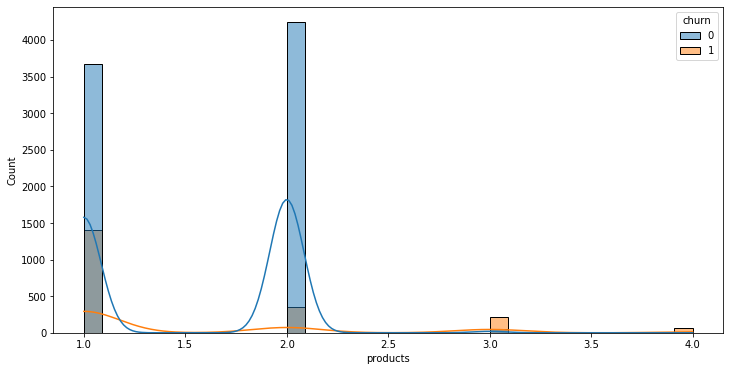

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(bank, x="products",  hue="churn", kde=True)

Данные имеют положительную скошенность. Группа оттока чаще пользуется только одним продуктом банка, а вот группы тех, кто остается пик значений на 2 продуктах.

In [37]:
products_1 = bank[(bank['churn'] == 1) & (bank['products'] < 4)]['products']
products_0 = bank[bank['churn'] == 0]['products']

Text(0.5, 1.0, 'доход группы, оставшихся с банком клиентов')

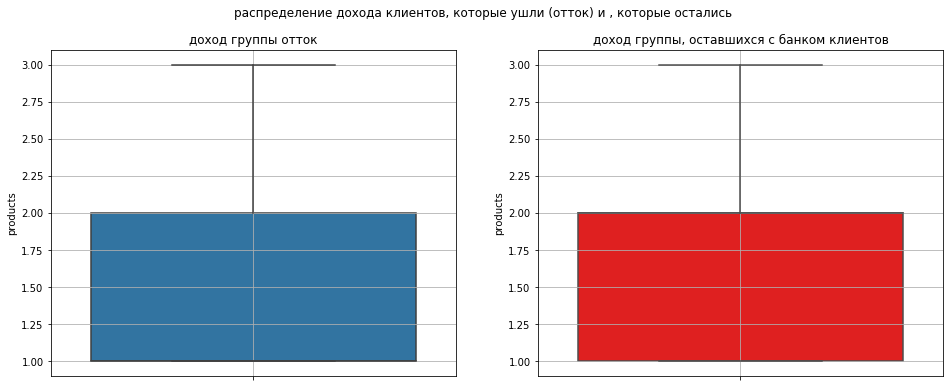

In [38]:
fig=plt.figure(figsize=(16,6))
plt.suptitle('распределение дохода клиентов, которые ушли (отток) и , которые остались')
fig = plt.subplot(121)
sns.boxplot(y=products_1)
plt.title('доход группы отток')
plt.grid(True)
plt.subplot(122)
sns.boxplot(y= products_0, color='red')
plt.grid(True)
plt.title('доход группы, оставшихся с банком клиентов')

Группа оттока имела клиентов с 4 продуктами, диаграмма размаха показывает нам их как выброс. 

In [39]:
print(np.percentile(bank[bank['churn'] == 1]['products'], [90, 95, 99])) 

[3. 3. 4.]


Не более 1% клиентов пользуются 4 продуктами. Для проверки гипотезы предлагаю удалить таких пользователей, что бы убрать влияние выброса на данные. 

Проверим нашу гипотезу о том, что количество используемых продуктов различен между теми клиентами, которые ушли и теми, которые остались.
Чтобы понять, различаются ли среднее количество используемых продуктов, из разных групп, будем использовать критерий о равенстве средних двух совокупностей.

Сформулируем гипотезы

##### H0
Средний количество используемых продуктов между теми клиентами, которые ушли и теми, которые остались одинаков.

##### H1
Средний количество используемых продуктов между теми клиентами, которые ушли и теми, которые остались различается.

In [40]:
result = st.ttest_ind(products_0, products_1)
print('p-значение',result.pvalue)
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение 4.7726578382295684e-26
Отвергаем нулевую гипотезу


##### Вывод:
После того как мы убрали выбросы, мы получили, что средние показатели в количестве используемых продуктов различается и мы можем утверждать, что клиенты, которые остаются в банке, в среднем пользуются большим количеством продуктов.

#### <a id="ch5">Общий вывод</a>
Анализируя данные оттока клиентов были выявлены характеристики отличающие клиента склонного к оттоку от клиента, который лоялен банку, был составлен портрет клиента, который склонен к оттоку, а так же проверены гипотезы о разнице средних показателей характеристик клиентов в доходе и количестве используемых продуктов.

Доход между группами клиентов не имеет статистической значимой разницы, а вот количество используемых продуктов разница, несмотря на то, что клиенты из группы оттока пользовались и 3 и 4 продуктами, но в целом их средний показатель ниже, чем у группы клиентов, лояльных банку. Клиент из группы оттока чаще пользуется только 1 продуктом.


##### Портрет клиента склонному к оттоку
Средний клиент, который склонен к оттоку: в преобладающих случаях это женщина, в возрасте около 45 лет, это неактивный клиент, он так же, как и лояльный клиент банка, имеет 5 объектов собственности, но пользуется чаще 1 продуктом банка, и имеет кредитную карту. На счету у него, в среднем, 120 тысяч, а средняя зарплата около 100 тысяч, такой клиент имеет меньший балл кредитного скоринга, чем у лояльного клиента, а проживать такой клиент может в любом из 3-х городов.

Необходимо удержать более возрастную категорию клиентов, направив разработку продукта именно на них.

Так же рекомендуется провести кластеризацию клиентов используя алгоритмы обучения без учителя. Так мы сможем отобрать группы клиентов с схожими признаками, отсортировать их по доле оттока и увидеть наиболее влияющие признаки на отток.